## Problem statement ###
we have dataset of student we have to predict Studentss performance based on the variable like Gender,marks_score,parental level of education,lunch and test preparation course


# Life cycle of any ML project
1) understanding problem statement
2) Data collection
3) Exploratory data analysis
4) Data preprocessing
5) Data visualization
6) model training 
7) selecting best model


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df=pd.read_csv('data/stud.csv')

In [41]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [44]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [45]:
df.shape

(1000, 8)

In [46]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## No null values found

In [47]:
cat_feat=[features for features in df.columns if df[features].dtype =='O']
print('we have {} categorical features :{}'.format(len(cat_feat),cat_feat))

numeric_features=[features for features in df.columns if df[features].dtype !='O']
print(f" we have {len(numeric_features)} numeric features : {numeric_features}")

we have 5 categorical features :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
 we have 3 numeric features : ['math_score', 'reading_score', 'writing_score']


# 5 categorical features and 3 numeric features 


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [50]:
print("categories in gender column " , df['gender'].unique())
print("categories in race_ethnicity  column " , df['race_ethnicity'].unique())
print("categories in parental_level_of_education  " , df['parental_level_of_education'].unique())
print("categories in Lunch are " , df['lunch'].unique())
print("categories in test preparation course are ",df['test_preparation_course'].unique())

categories in gender column  ['female' 'male']
categories in race_ethnicity  column  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in Lunch are  ['standard' 'free/reduced']
categories in test preparation course are  ['none' 'completed']


In [51]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']= df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# converted all scoring into one column which is = total score 
# created the average column for better understanding

In [53]:
reading_full=df[df['reading_score']==100]['average_score'].count()
maths_full=df[df['math_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()

print(f"{reading_full} students take full makrs in reading")
print(f"{maths_full} students take full marks in maths")
print(f"{writing_full} students take full marks writing")


17 students take full makrs in reading
7 students take full marks in maths
14 students take full marks writing


In [54]:
less_20_reading=df[df['reading_score'] <=20]['average_score'].count()
less_20_maths=df[df['math_score'] <=20]['average_score'].count()
less_20_writing=df[df['writing_score'] <=20]['average_score'].count()

print(f"{less_20_reading} students below 20 makrs in reading")
print(f"{less_20_maths} students take below 20 marks in maths")
print(f"{less_20_writing} students take below 20  marks writing")


1 students below 20 makrs in reading
4 students take below 20 marks in maths
3 students take below 20  marks writing


# FULL MARKS 
17 STUDENTS TOOK FULL MAKRS IN READING 
7 students take full marks in maths
14 students take full marks writing
# INSIGHTS 
IN READING  STUDENTS PERFORMS WELL AS COMPARED TO OTHER 2 SUBJECTS

# FAIL
4 STUDENTS FAIL IN MATHS, 3 IN WRITING
# INSIGHTS
most of  students fail in maths as comapred to other subjects 


C:\Users\ibrah\AppData\Local\Temp\ipykernel_26788\4010606229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


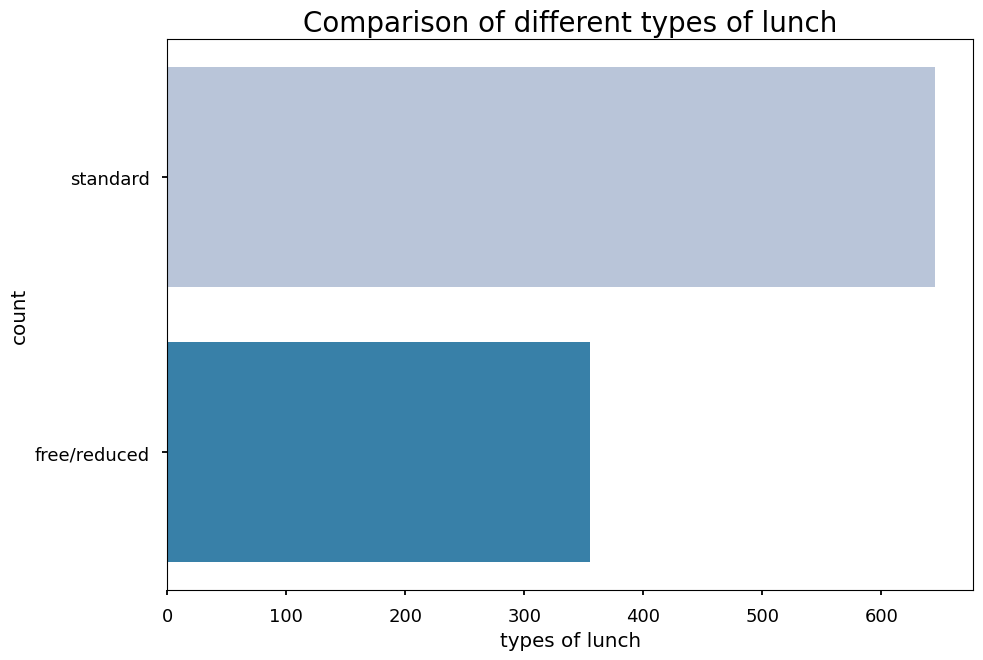

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [56]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# data visualization 

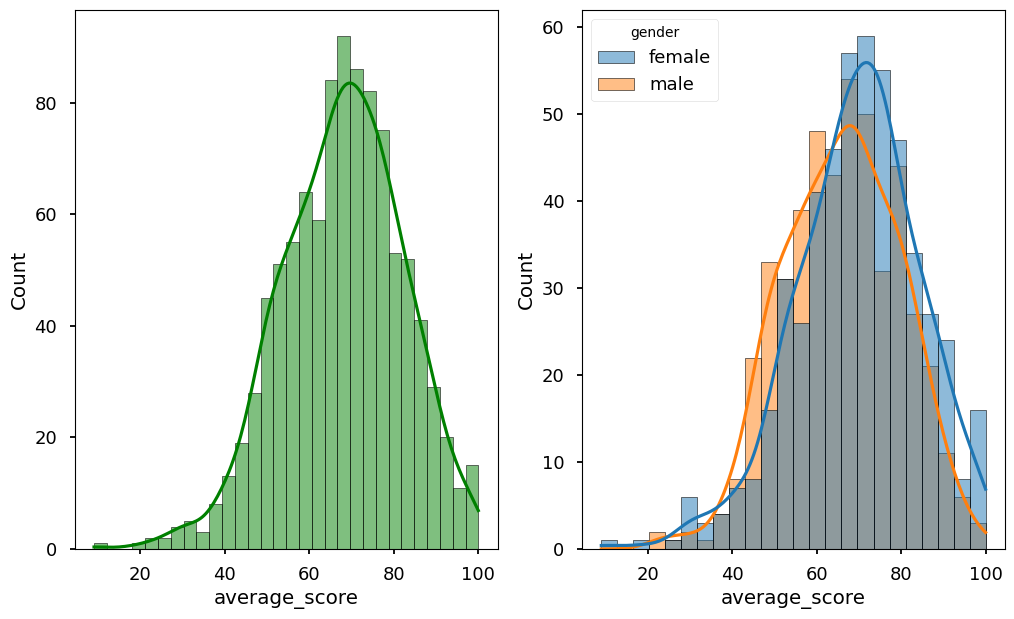

In [57]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='average_score',kde=True, hue='gender')
plt.show()

# histograms
used to compare and visualize which feature effecting more,contributing more like meaniingful insights
# observation
1) average score is 80
2) Females scores more than male so female increased the class ratio


In [58]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

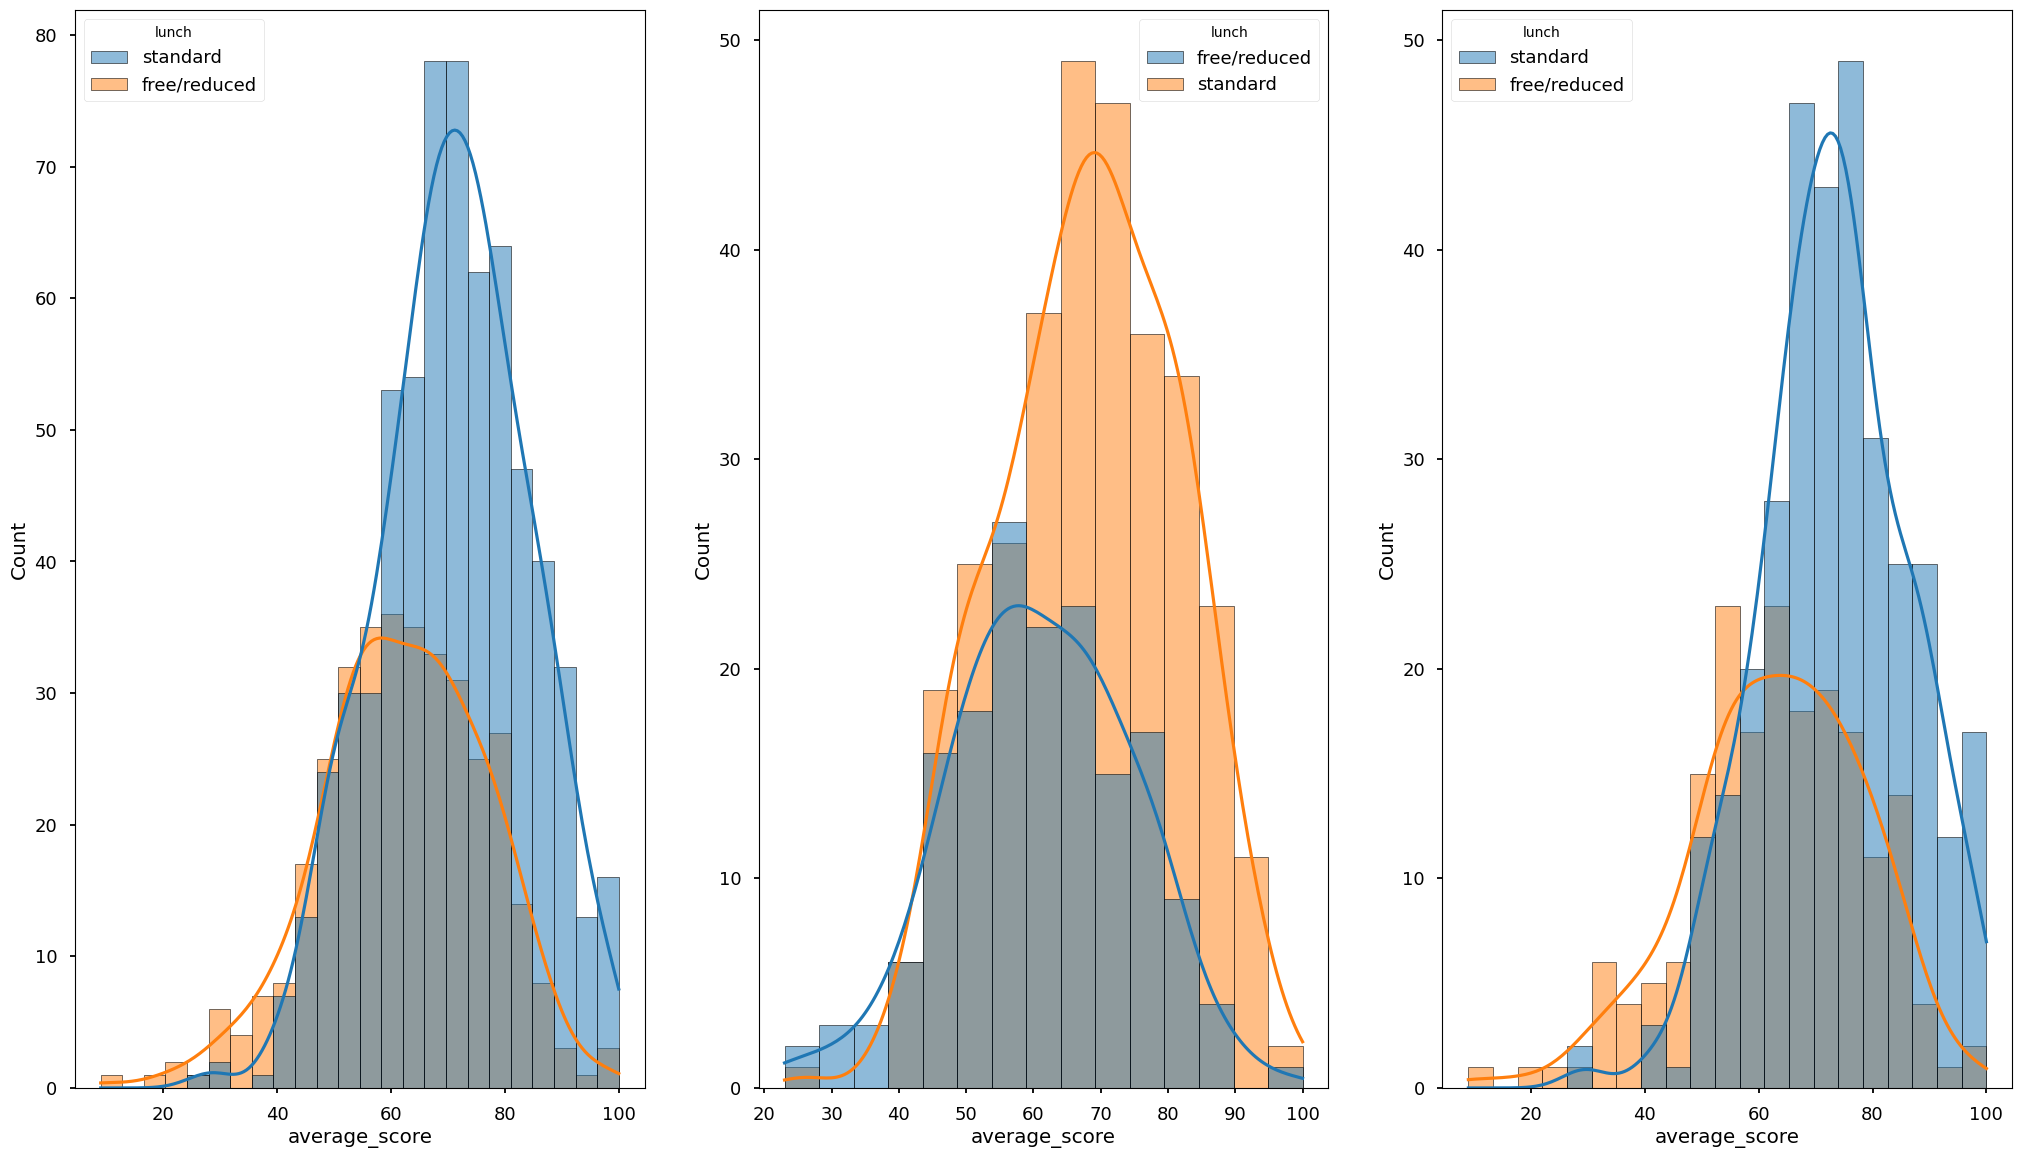

In [59]:
plt.figure(figsize=(25,14))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='male'], x='average_score',kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'], x='average_score',kde=True, hue='lunch')
plt.show()

## observation in male :
Male students who are taking standard/nutrionist lunch tend to score high more than Free lunch male
male(standard)>male(free)

# obseration in female :
female students who are taking standard/nutrionist lunch tend to score high more than Free lunch female
female(standard) > female(free)


In [60]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

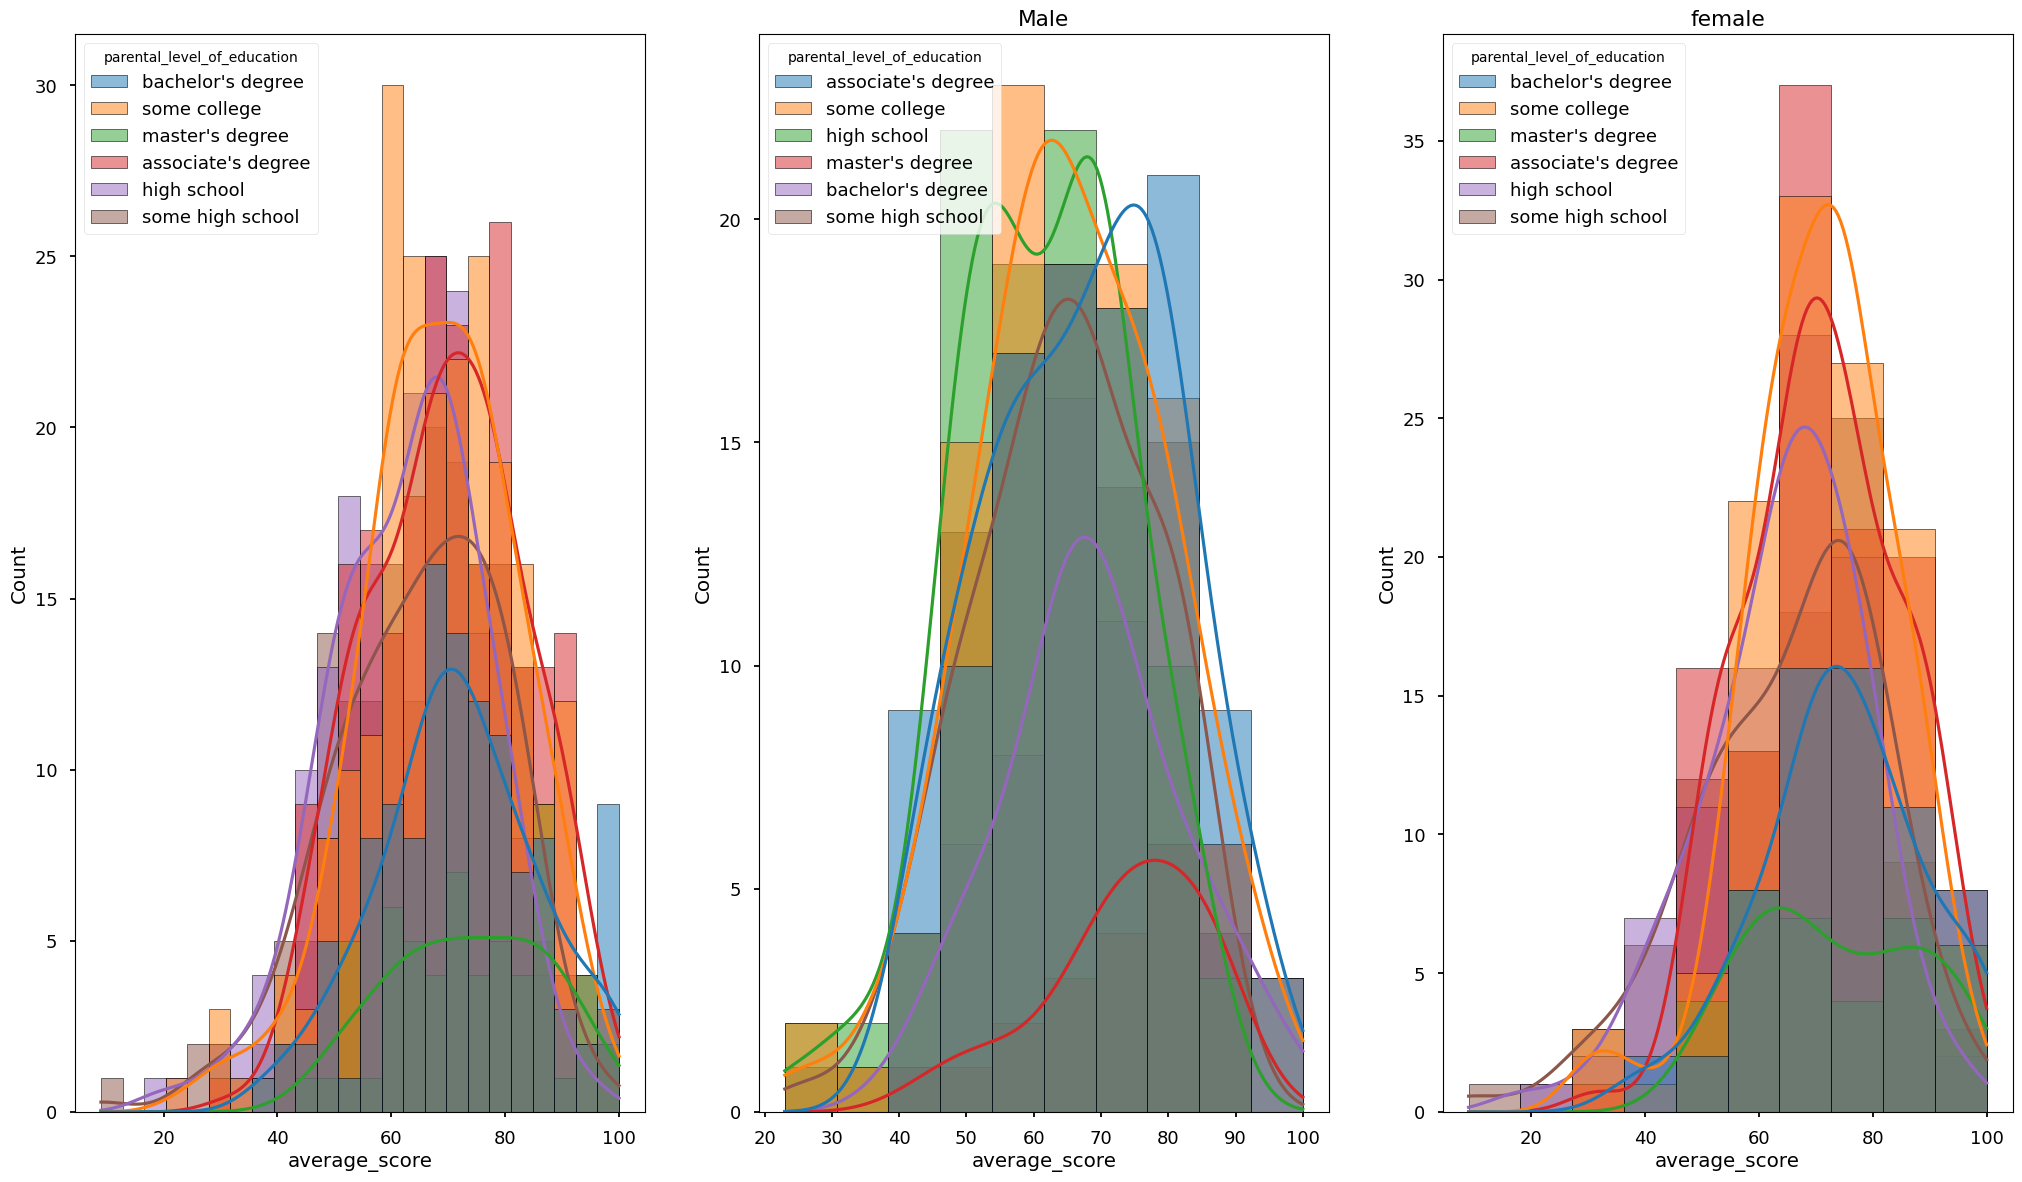

In [61]:
plt.figure(figsize=(25,14))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education',)
plt.subplot(1,3,2)
plt.title('Male')
sns.histplot(data=df[df.gender=='male'], x='average_score',bins=10,kde=True, hue='parental_level_of_education')
plt.subplot(1,3,3)
plt.title('female')
sns.histplot(data=df[df.gender=='female'], x='average_score',bins=10,kde=True, hue='parental_level_of_education')
plt.show()

# obervation
parents degree doesnot matter in predicting score of male and female


In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [63]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

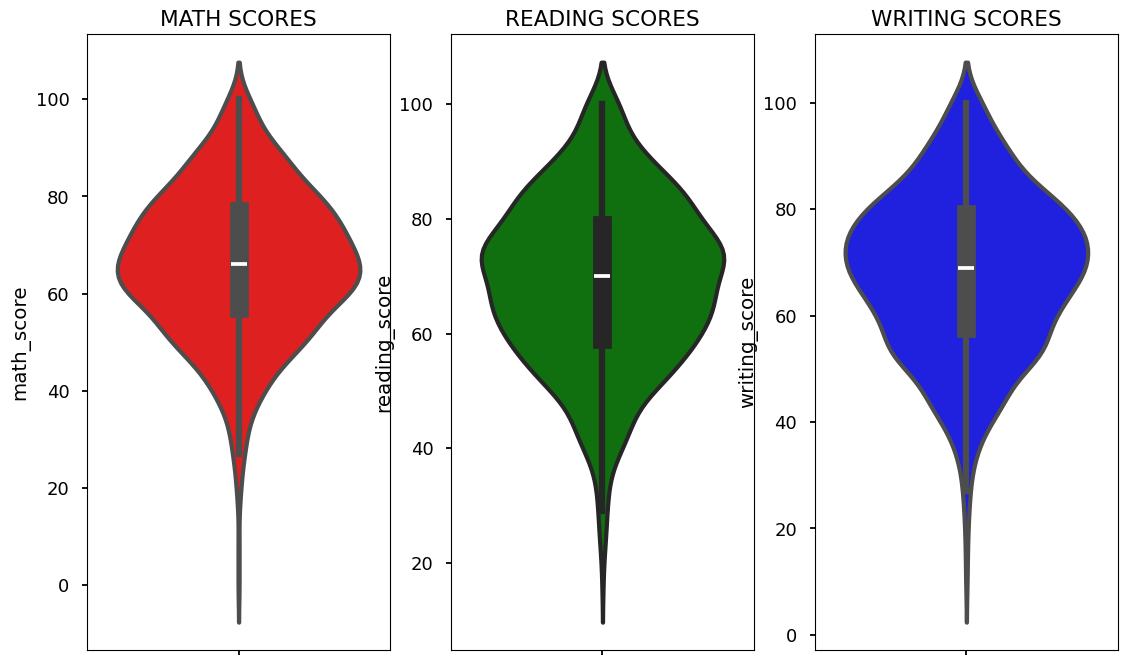

In [64]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

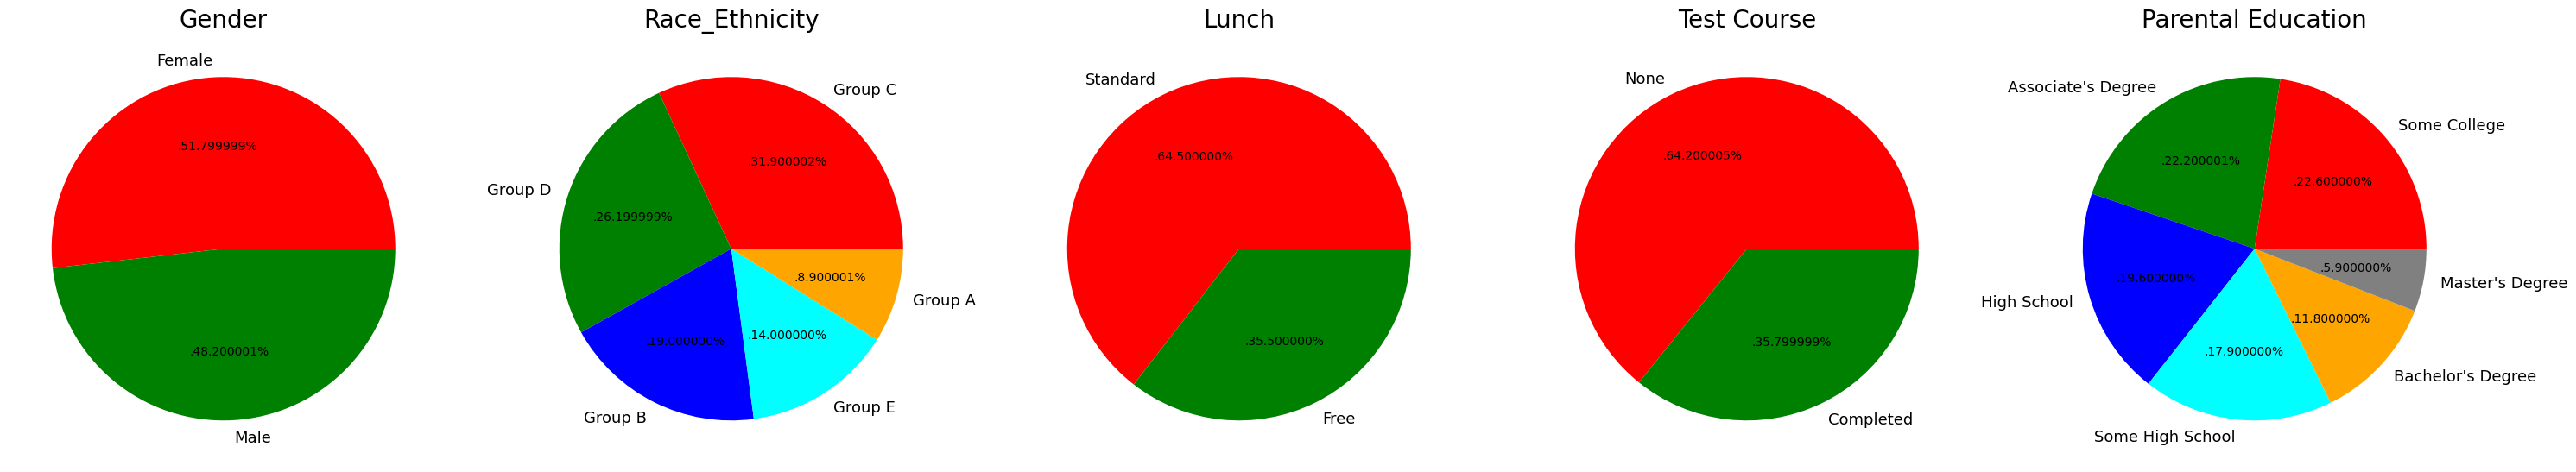

In [65]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_26788\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


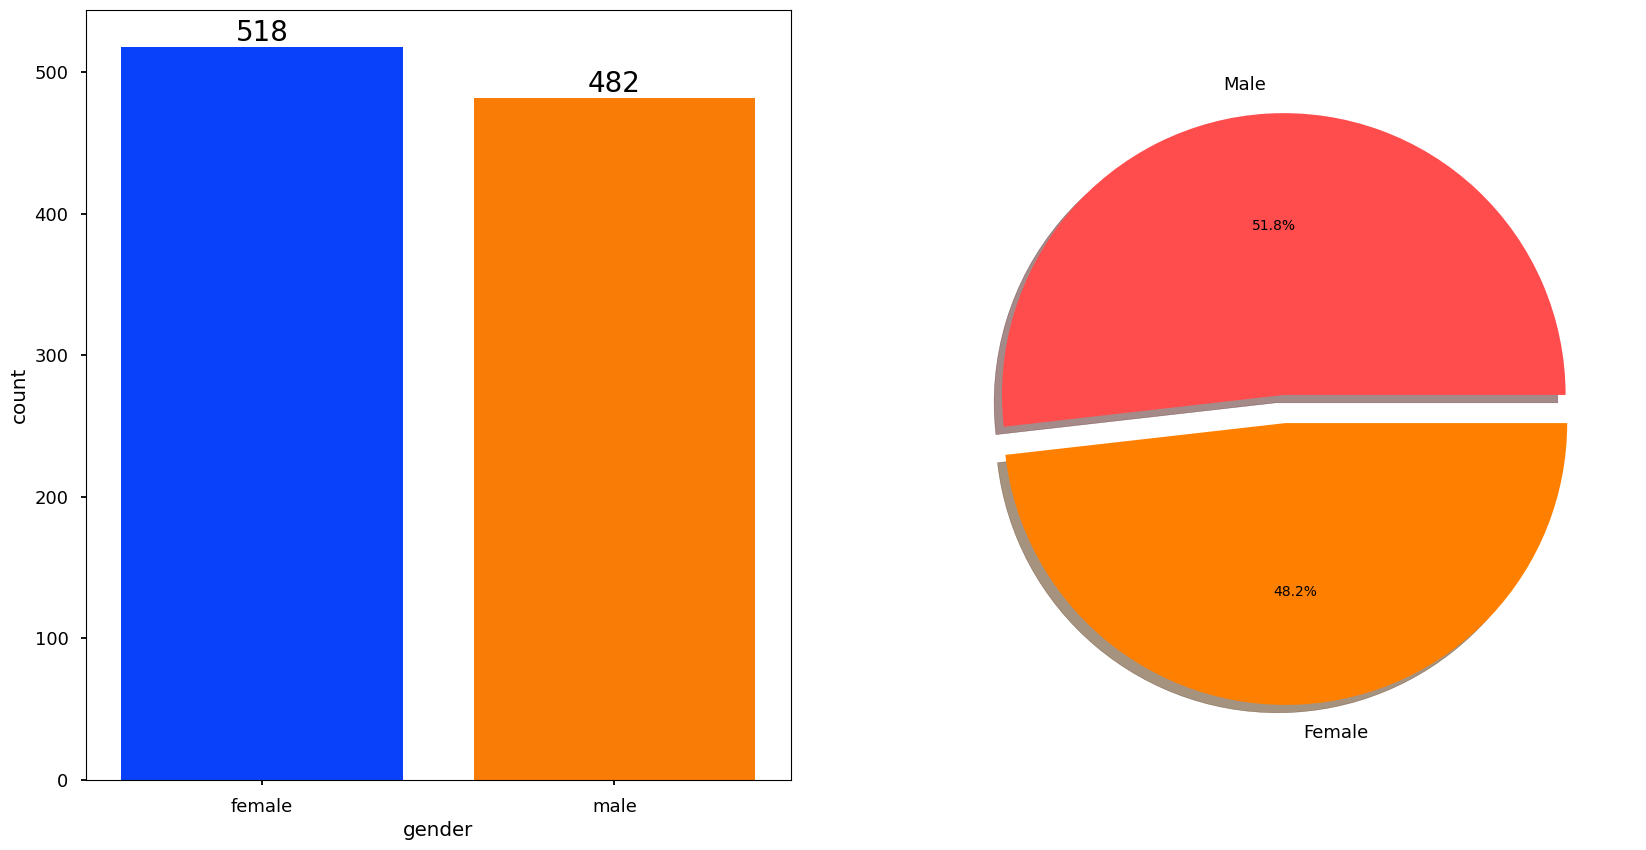

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [67]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [68]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

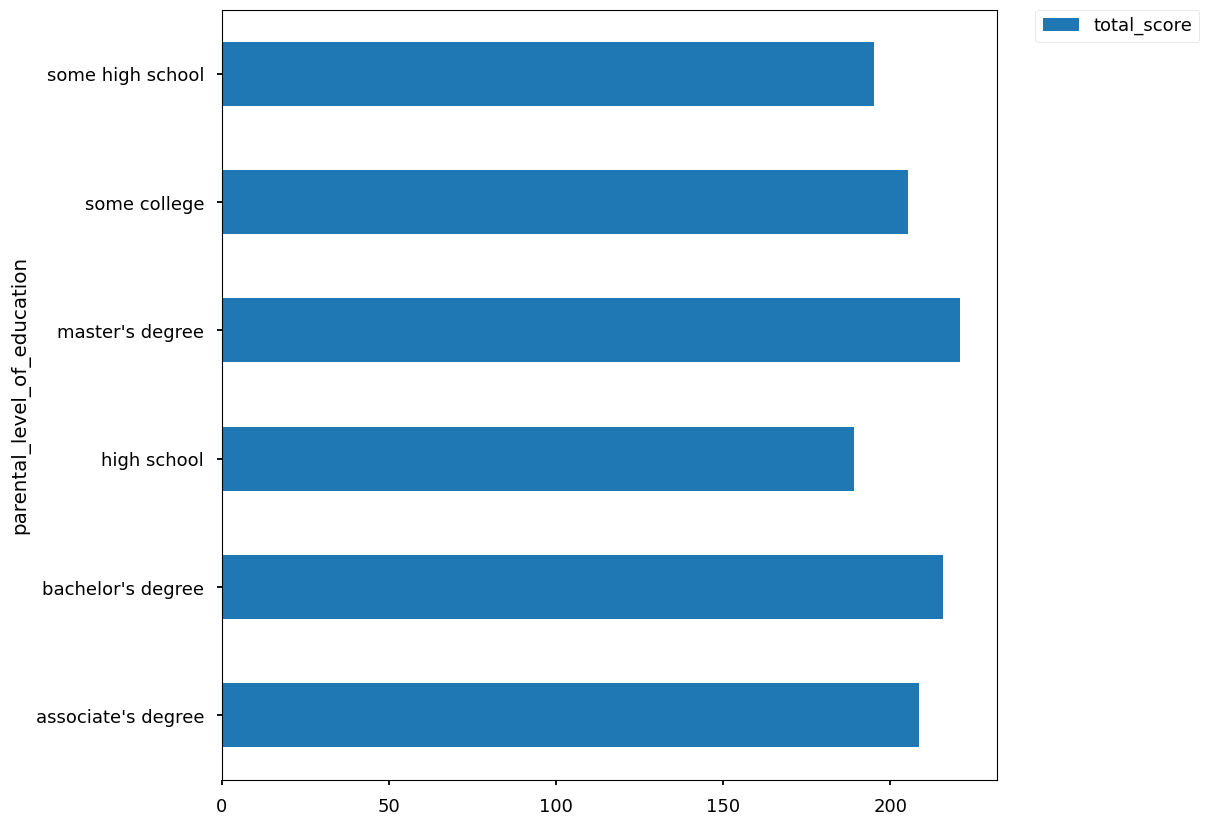

In [69]:
df.groupby('parental_level_of_education',)['total_score'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# observation
The students of parents who have masters or bachelors degree are more tend to score high as compared to other students

<Axes: xlabel='lunch', ylabel='writing_score'>

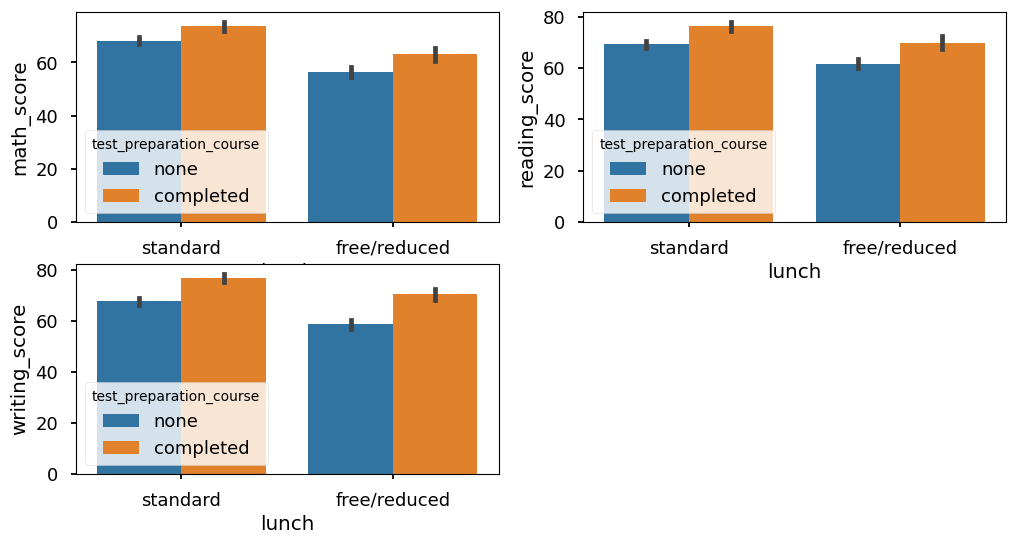

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# observation students who have completed the test preparationn course have score the highest

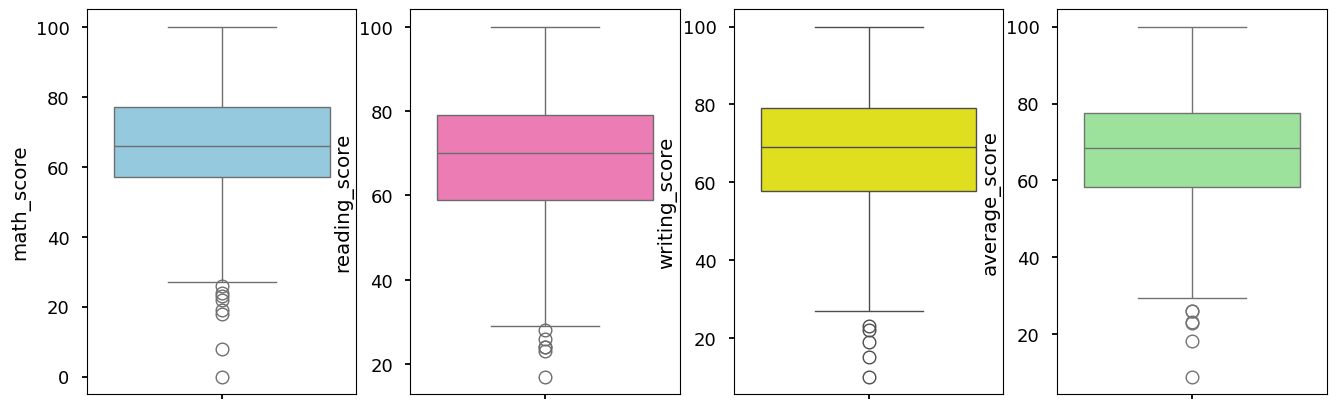

In [71]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

# conclusion
RESULT :
-->  1) Female are tend to perform well as compared to male  female > male
-->  2) parental level education all so played a role in students achieving marks masters degree or bachelors degree secured more marks
-->  3) standard of lunch also contribute to achive good marks as compared to students who are not able to buy standard lunch
-->  4) students who have achieved the test preparation course achieved are tend to perform welll
-->  5) scores increase linearly


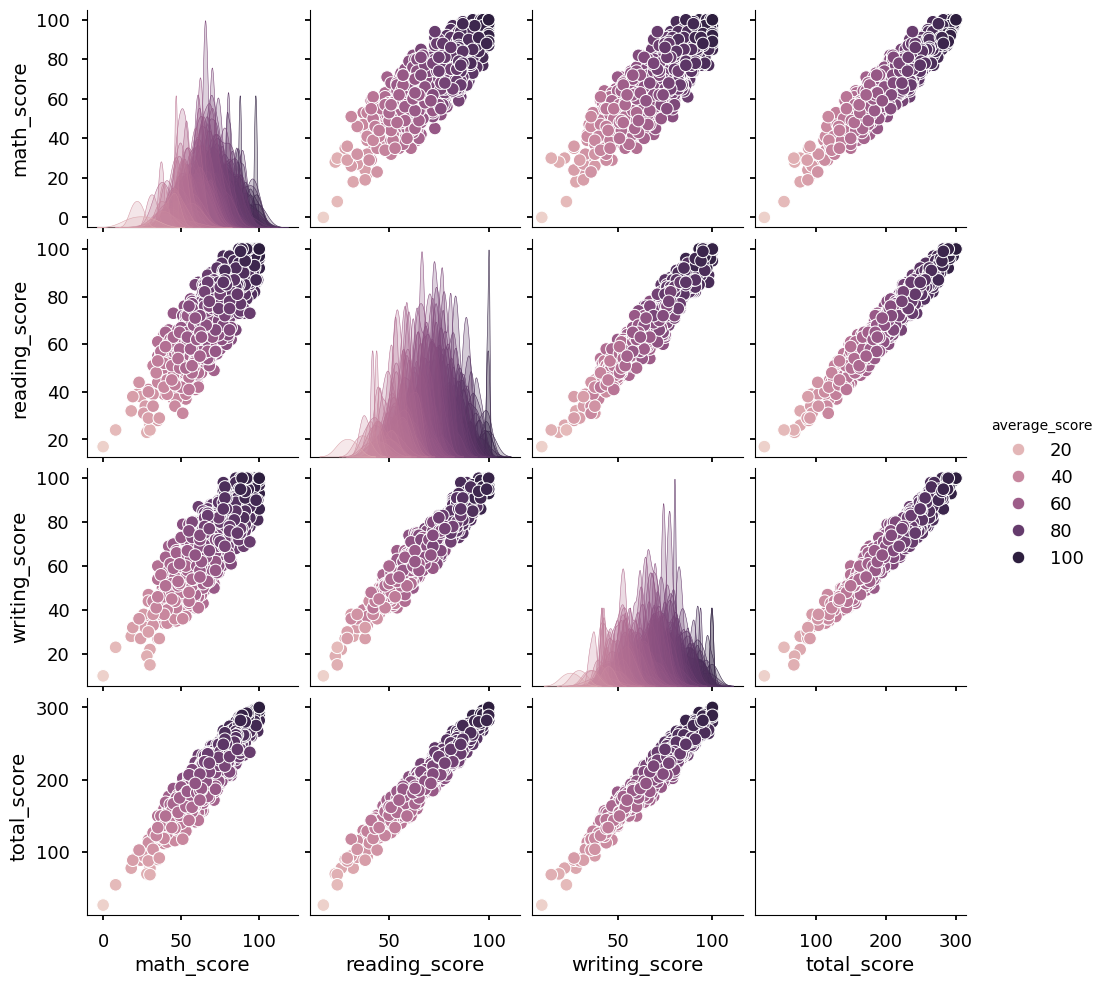

In [74]:
sns.pairplot(df,hue = 'average_score')
plt.show()